# Laptops Case Study (Final Exam)
##Hima Tulasi 

In [5]:
import pandas as pd
import seaborn as sns

## Get the data and examine it

In [6]:
data = pd.read_csv('laptops.csv')

In [7]:
data.head()

,brand,laptop_name,display_size,processor_type,graphics_card,disk_space,discount_price,old_price,ratings_5max
0,HP,Notebook 14-df0008nx,14.0,Intel Celeron N4000,Intel HD Graphics 600,64 GB (eMMC),1259.0,1259.0,0 / 5
1,Lenovo,IdeaPad 330S-14IKB,14.0,Intel Core i5-8250U,Intel UHD Graphics 620,1 TB HDD,1849.0,2099.0,3.3 / 5
2,Huawei,MateBook D Volta,14.0,Intel Core i5-8250U,NVIDIA GeForce MX150 (2 GB),256 GB SSD,2999.0,3799.0,0 / 5
3,Dell,Inspiron 15 3567,15.6,Intel Core i3-7020U,Intel HD Graphics 620,1 TB HDD,1849.0,1849.0,0 / 5
4,Asus,VivoBook 15 X510UR,15.6,Intel Core i7-8550U,NVIDIA GeForce 930MX (2 GB),1 TB HDD,2499.0,3149.0,0 / 5


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   brand           205 non-null    object 
 1   laptop_name     204 non-null    object 
 2   display_size    205 non-null    float64
 3   processor_type  205 non-null    object 
 4   graphics_card   205 non-null    object 
 5   disk_space      205 non-null    object 
 6   discount_price  205 non-null    float64
 7   old_price       205 non-null    float64
 8   ratings_5max    205 non-null    object 
dtypes: float64(3), object(6)
memory usage: 14.5+ KB


In [9]:
data.nunique()

brand               9
laptop_name       134
display_size       11
processor_type     26
graphics_card      52
disk_space         30
discount_price    124
old_price         104
ratings_5max       16
dtype: int64

## Final Exam Questions
Several hints are given as comments; however, you are not required to use them if you have a different method to achieve the same result.

### 1. How many different laptop brands are there?

In [10]:
brands = data.nunique()
brandCount=brands.count()
brandCount

9

### 2. What are the names and prices of the most and least expensive laptops?

In [11]:
# Sort by old_price. Then, select the first and last rows to get the least and most expensive rows.

old_sort = data.sort_values(by=['old_price'])

In [12]:
old_sort.head(1)

,brand,laptop_name,display_size,processor_type,graphics_card,disk_space,discount_price,old_price,ratings_5max
108,Acer,Aspire 1 A114-31-C6WP,14.0,Intel Celeron N3350,Intel HD Graphics 505,64 GB (eMMC),999.0,999.0,0 / 5


In [13]:
old_sort.tail(1)

,brand,laptop_name,display_size,processor_type,graphics_card,disk_space,discount_price,old_price,ratings_5max
132,Apple,MacBook Pro (Retina + Touch Bar),15.4,Intel Core i9,Radeon Pro 560X GDDR5 (4 GB),512 GB SSD,12499.0,12499.0,0 / 5


### 3. How are the laptop prices distributed?

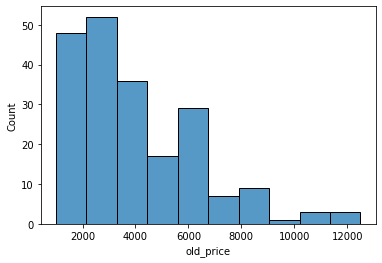

In [14]:
sns.histplot(data,x= 'old_price')

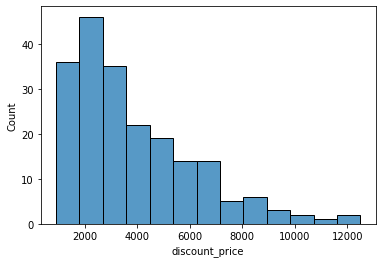

In [15]:
sns.histplot(data,x= 'discount_price')

### 4. What are the min, max, and mean display sizes?

In [16]:
data[['display_size']].min()

display_size    12.0
dtype: float64

In [17]:
data[['display_size']].max()

display_size    18.4
dtype: float64

In [18]:
data[['display_size']].mean()

display_size    14.579805
dtype: float64

### 5. What is the average price for each laptop brand?

In [19]:
data.groupby('brand').mean()

,display_size,discount_price,old_price
brand,,,
Acer,15.070833,2515.583333,2773.083333
Apple,13.728947,6802.025000,7082.288158
Asus,15.018182,2972.636364,3393.090909
Dell,14.844118,3782.911765,3872.029412
HP,14.579167,3226.916667,3382.541667
Huawei,14.396667,3615.666667,4040.666667
Lenovo,14.734783,1998.130435,2216.391304
MSI,18.400000,9071.000000,9071.000000
Microsoft,13.500000,5132.333333,5132.333333


### 6. What is the average laptop price for each processor brand?

In [20]:
# Examine the unique values in the processor_type column
data[['processor_type']].nunique()
# Extract the processor brand name from the processor_type column

# Group by brand and get brand with highest price

processor_type    26
dtype: int64

### 7. What are the average ratings for each laptop brand?

In [21]:
from numpy import NaN
# Examine the ratings_5max column
data.ratings_5max


0        0 / 5
1      3.3 / 5
2        0 / 5
3        0 / 5
4        0 / 5
        ...   
200    3.8 / 5
201    4.0 / 5
202      0 / 5
203    4.4 / 5
204      0 / 5
Name: ratings_5max, Length: 205, dtype: object

In [22]:
# Convert all ratings to a float value that's rounded to 1 decimal place.
data[['ratings_Min', 'ratings_Max']] = data['ratings_5max'].str.split('/', expand=True).astype(float)  
data['ratings_converted_back'] = data['ratings_Min']/data['ratings_Max']   
data['ratings_converted_back']

0      0.00
1      0.66
2      0.00
3      0.00
4      0.00
       ... 
200    0.76
201    0.80
202    0.00
203    0.88
204    0.00
Name: ratings_converted_back, Length: 205, dtype: float64

In [23]:
# Replace 0 values with NaN so they won't be included in aggregate functions
ratings_converted_back_2 = data['ratings_converted_back'].replace(0, NaN)

In [24]:
# Drop the old column
del data['ratings_converted_back']

In [25]:
# Examine the new ratings column
print(ratings_converted_back_2)

0       NaN
1      0.66
2       NaN
3       NaN
4       NaN
       ... 
200    0.76
201    0.80
202     NaN
203    0.88
204     NaN
Name: ratings_converted_back, Length: 205, dtype: float64


In [26]:
# Calculate the average ratings for each laptop brand
data.groupby('brand').mean()

,display_size,discount_price,old_price,ratings_Min,ratings_Max
brand,,,,,
Acer,15.070833,2515.583333,2773.083333,0.950000,5.0
Apple,13.728947,6802.025000,7082.288158,2.281579,5.0
Asus,15.018182,2972.636364,3393.090909,0.590909,5.0
Dell,14.844118,3782.911765,3872.029412,1.170588,5.0
HP,14.579167,3226.916667,3382.541667,1.056250,5.0
Huawei,14.396667,3615.666667,4040.666667,2.425000,5.0
Lenovo,14.734783,1998.130435,2216.391304,2.165217,5.0
MSI,18.400000,9071.000000,9071.000000,0.000000,5.0
Microsoft,13.500000,5132.333333,5132.333333,1.366667,5.0


### 8. How many laptops have a discount price?

In [27]:
data.info()
# The number of laptops is 205 and the number of discount_price applicable laptops is also 205, so all 205 laptops have a discount price.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   brand           205 non-null    object 
 1   laptop_name     204 non-null    object 
 2   display_size    205 non-null    float64
 3   processor_type  205 non-null    object 
 4   graphics_card   205 non-null    object 
 5   disk_space      205 non-null    object 
 6   discount_price  205 non-null    float64
 7   old_price       205 non-null    float64
 8   ratings_5max    205 non-null    object 
 9   ratings_Min     205 non-null    float64
 10  ratings_Max     205 non-null    float64
dtypes: float64(5), object(6)
memory usage: 17.7+ KB


### 9. How is display size related to price?

In [28]:
data.corr()[['display_size']]
# price has a negative corrolation when related to display size

,display_size
display_size,1.000000
discount_price,-0.199608
old_price,-0.214365
ratings_Min,-0.204323
ratings_Max,NaN


### 10. Use Scikit-learn to create and use a linear regression model to predict rating or price. 
Hint: use the Chapter 10 example as a guide as you create this model. (https://colab.research.google.com/github/plthomps/ITCS3162-Data-Mining/blob/main/ch10_examples.ipynb)

Our steps are: 
1) Import necessary libraries 
2) split the dataset into train and test 
3) create model from the training dataset 
4) validate model with test dataset 
5) if model is valid, predict with it

Model the linear relationship between the difference of discount_price and old_price. Use Chapter 10 Notebook as a reference: https://colab.research.google.com/github/plthomps/ITCS3162-Data-Mining/blob/main/ch10_examples.ipynb


In [34]:
from sklearn import linear_model
# Use sklearn module to create, validate, and use a linear regression model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# create the model from the training dataset
dell = data[data['brand'] == 'Dell']

x_train, x_test, y_train, y_test = train_test_split(
    dell[['display_size']], dell[['old_price']],
    test_size=0.5, random_state=20)

model = LinearRegression()
model.fit(x_train, y_train)


# validate the model with the test dataset
model.score(x_test,y_test)
# use the model to make predictions
y_predicted = model.predict(x_test)
# put predicted values in a frame

# combine the test data and the predicted data
predicted = pd.DataFrame(y_predicted, columns=['predictedPrice'])

final = predicted.join([x_test.reset_index(drop=True), 
                        y_test.reset_index(drop=True)])
final[['display_size','old_price','predictedPrice']].head()
# plot the relationship (if there is one) in a meaningful way

final['residual'] = final.old_price - final.predictedPrice
final

,predictedPrice,display_size,old_price,residual
0,3411.280759,15.6,6499.0,3087.719241
1,3411.280759,15.6,3249.0,-162.280759
2,4191.677428,14.0,2949.0,-1242.677428
3,4191.677428,14.0,3799.0,-392.677428
4,3411.280759,15.6,1399.0,-2012.280759
5,4533.100970,13.3,8099.0,3565.899030
6,3411.280759,15.6,6688.0,3276.719241
7,3411.280759,15.6,2549.0,-862.280759
8,4533.100970,13.3,6399.0,1865.899030
9,3411.280759,15.6,2249.0,-1162.280759
